In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [7]:
path = './raw_data/HCMWeatherDaily.xlsx'
df = pd.read_excel(path)

### STEP 2

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3934 entries, 0 to 3933
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              3934 non-null   object 
 1   datetime          3934 non-null   object 
 2   tempmax           3934 non-null   float64
 3   tempmin           3934 non-null   float64
 4   temp              3934 non-null   float64
 5   feelslikemax      3934 non-null   float64
 6   feelslikemin      3934 non-null   float64
 7   feelslike         3934 non-null   float64
 8   dew               3934 non-null   float64
 9   humidity          3934 non-null   float64
 10  precip            3934 non-null   float64
 11  precipprob        3934 non-null   int64  
 12  precipcover       3934 non-null   float64
 13  preciptype        3013 non-null   object 
 14  snow              3934 non-null   int64  
 15  snowdepth         3934 non-null   int64  
 16  windgust          3934 non-null   float64


In [9]:
df.isnull().sum()

name                   0
datetime               0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
precipcover            0
preciptype           921
snow                   0
snowdepth              0
windgust               0
windspeed              0
winddir                0
sealevelpressure       0
cloudcover             0
visibility             0
solarradiation         0
solarenergy            0
uvindex                0
severerisk          2566
sunrise                0
sunset                 0
moonphase              0
conditions             0
description            0
icon                   0
stations               0
dtype: int64

In [10]:
df.describe()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase
count,3934.000000,3934.000000,3934.000000,3934.000000,3934.000000,3934.000000,3934.000000,3934.000000,3934.000000,3934.000000,...,3934.000000,3934.000000,3934.000000,3934.000000,3934.000000,3934.000000,3934.000000,3934.000000,1368.000000,3934.000000
mean,33.121988,25.111439,28.451652,38.539832,25.788587,31.650102,23.497051,76.545196,5.216218,76.029487,...,20.214845,185.484698,1009.078012,53.164514,9.331901,213.128495,18.401779,7.803762,27.368421,0.483907
std,1.809156,1.610926,1.390713,3.286620,2.933660,2.936379,2.263015,9.797815,12.374563,42.695775,...,5.955469,80.384755,2.092720,14.376700,0.779568,49.684578,4.295429,1.493652,17.478722,0.288522
min,24.900000,18.000000,22.800000,24.900000,18.000000,22.800000,12.700000,49.200000,0.000000,0.000000,...,7.600000,0.000000,1001.500000,8.800000,5.500000,0.000000,0.000000,0.000000,5.000000,0.000000
25%,32.000000,24.000000,27.500000,36.400000,24.000000,29.700000,22.400000,69.600000,0.100000,100.000000,...,16.600000,128.225000,1007.600000,42.800000,8.900000,185.575000,16.025000,7.000000,10.000000,0.250000
50%,33.000000,25.000000,28.400000,39.100000,25.000000,31.400000,24.200000,77.400000,0.800000,100.000000,...,18.400000,181.200000,1009.000000,52.100000,9.500000,221.250000,19.100000,8.000000,30.000000,0.480000
75%,34.000000,26.000000,29.300000,40.500000,26.000000,33.500000,25.100000,84.200000,5.000000,100.000000,...,22.300000,250.675000,1010.400000,63.200000,9.900000,249.900000,21.600000,9.000000,30.000000,0.750000
max,39.000000,30.000000,33.000000,48.800000,40.200000,41.900000,27.900000,99.500000,227.200000,100.000000,...,83.500000,360.000000,1016.300000,100.000000,20.000000,315.800000,27.200000,10.000000,75.000000,0.980000


In [11]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [12]:
df.columns

Index(['name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations'],
      dtype='object')

| Column Name | Meaning | Unit / Data Type | Explanation |
|--------------|----------|------------------|-------------|
| name | Location name | text | Example: “Ho Chi Minh City” |
| datetime | Observation date | yyyy-mm-dd | Each row represents the data for one day |
| tempmax | Maximum temperature of the day | °C | The highest temperature recorded within 24 hours |
| tempmin | Minimum temperature of the day | °C | The lowest temperature recorded within 24 hours |
| temp | Average daily temperature | °C | (tempmax + tempmin) / 2 or sensor-measured daily average |
| feelslikemax | Maximum “feels-like” temperature | °C | Depends on humidity and wind speed |
| feelslikemin | Minimum “feels-like” temperature | °C |  |
| feelslike | Average “feels-like” temperature | °C |  |
| dew | Dew point temperature | °C | Indicates the amount of moisture in the air |
| humidity | Average relative humidity | % |  |
| precip | Total daily precipitation | mm | Total accumulated rainfall within 24 hours |
| precipprob | Probability of precipitation | % | Forecasted or measured chance of rain |
| precipcover | Percentage of time it rained during the day | % | Example: 6 hours of rain → 25% coverage |
| preciptype | Type of precipitation | text | “rain”, “snow”, “freezing rain”, etc. (mostly “rain” in HCM) |
| snow | Snowfall amount | mm | Always 0 in Vietnam |
| snowdepth | Snow depth | mm | Always 0 in Vietnam |
| windgust | Maximum wind gust speed | km/h | The strongest gust recorded within the day |
| windspeed | Average wind speed | km/h |  |
| winddir | Average wind direction | degrees (°) | 0 = North, 90 = East, 180 = South, 270 = West |
| sealevelpressure | Atmospheric pressure at sea level | hPa |  |
| cloudcover | Average cloud cover | % | 0 = clear sky, 100 = overcast |
| visibility | Average visibility | km |  |
| solarradiation | Average solar radiation | W/m² |  |
| solarenergy | Daily average solar energy | MJ/m² | Total amount of solar radiation during the day |
| uvindex | Maximum UV index | 0–11+ | >8 = very high, may cause sunburn |
| severerisk | Severe weather risk index | numeric (0–10) | Usually empty or 0 in Vietnam |
| sunrise | Sunrise time | hh:mm:ss |  |
| sunset | Sunset time | hh:mm:ss |  |
| moonphase | Moon phase | 0–1 | 0 = new moon, 0.5 = full moon, 1 = next new moon |
| conditions | Short weather condition description | text | e.g., “Clear”, “Rain”, “Overcast” |
| description | Detailed weather description | text | Example: “Partly cloudy throughout the day.” |
| icon | Weather icon | text | e.g., “rain”, “clear-day”, “partly-cloudy-day” |
| stations | Weather station code | text | Example: “VVTS” (Tan Son Nhat station) |


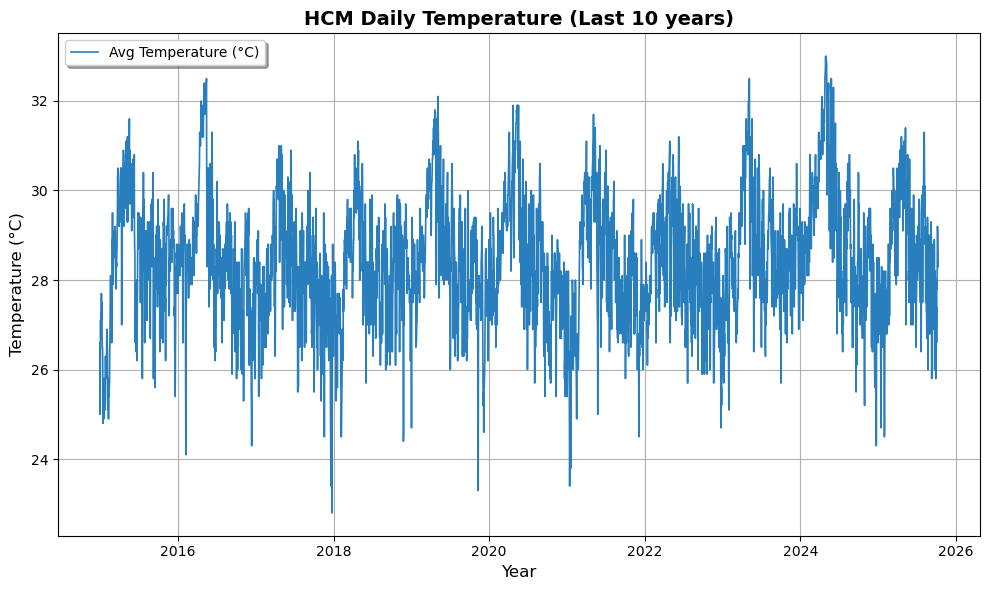

In [13]:
# Temperature trend plot
plt.figure(figsize=(10, 6))
plt.plot(
    df["datetime"], 
    df["temp"], 
    color="#297fbd",       
    linewidth=1.2,          
    label="Avg Temperature (°C)"
)

plt.title("HCM Daily Temperature (Last 10 years)", fontsize=14, fontweight="bold")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Temperature (°C)", fontsize=12)
plt.legend(frameon=True, facecolor="white", shadow=True)
plt.grid(True)
plt.tight_layout()
plt.show()



During the period **`2015–2025`**, the **daily average temperature** in **`Ho Chi Minh City`** ranged from **`around 24°C to 33°C`**, with an **overall mean of approximately 28.4°C**.

Overall, there was **no clear upward or downward trend** over time — the line plot indicates **stable temperatures** across the years, with only a few years slightly above the average (particularly **2023–2024**).

On closer inspection, the **2023–2024 period** shows **more peaks above 32°C**, suggesting a **slight warming trend** in recent years, possibly related to the **2023–2024 El Niño event** or **urbanization effects**.


In [14]:
df = df.sort_values(by='datetime')

In [15]:
df['month'] = df['datetime'].dt.month

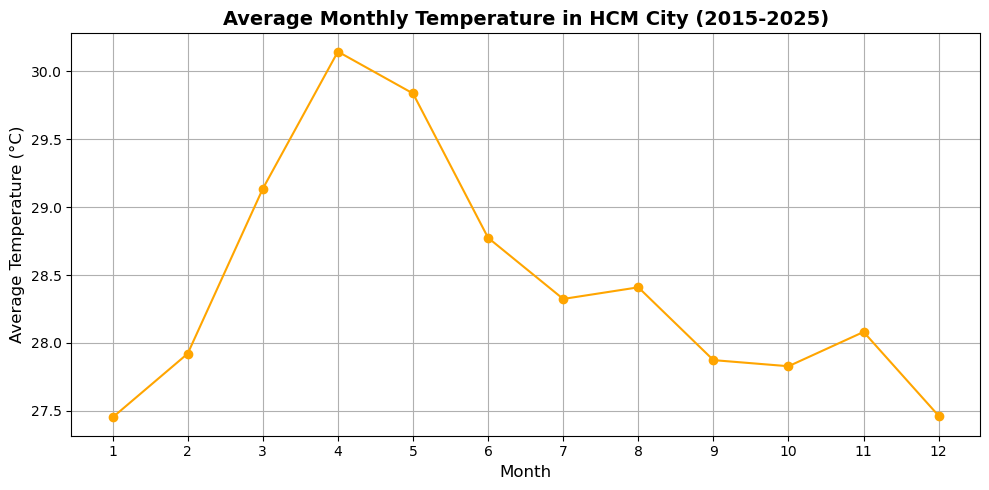

In [16]:
#Temperature by month 
monthly_avg = df.groupby('month')['temp'].mean()

plt.figure(figsize=(10,5), facecolor='white')
plt.plot(monthly_avg.index, monthly_avg.values, marker='o', color='orange')
plt.title('Average Monthly Temperature in HCM City (2015-2025)', fontsize = 14, fontweight = 'bold')
plt.xlabel('Month', fontsize= 12)
plt.xticks(range(1,13))
plt.ylabel('Average Temperature (°C)', fontsize= 12)
plt.grid(True)
plt.tight_layout()
plt.show()

**Ho Chi Minh City** has a **`tropical monsoon climate`** near the equator, characterized by two distinct seasons:

    Dry season: from December to April

    Rainy season: from May to November

During the dry season, temperatures increase steadily, reaching the annual peak in April. The lack of rainfall and strong solar radiation cause the hottest conditions of the year

From May to November, Ho Chi Minh City enters the rainy season. Although the temperature slightly decreases, the high humidity and frequent rainfall create a humid and muggy atmosphere typical of **tropical climates**.

In [17]:
df['year'] = df['datetime'].dt.year

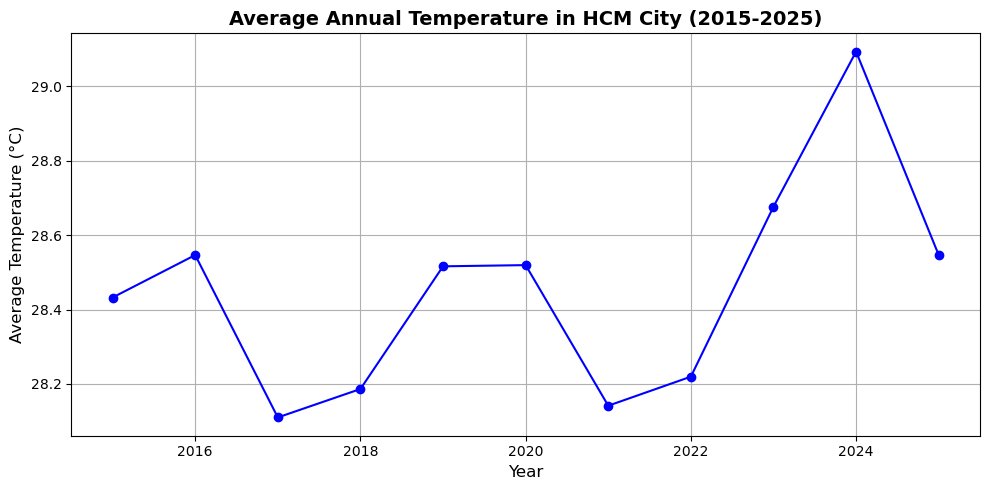

In [18]:
yearly_avg = df.groupby('year')['temp'].mean()

plt.figure(figsize=(10,5))
plt.plot(yearly_avg.index, yearly_avg.values, marker='o', color='blue')
plt.title('Average Annual Temperature in HCM City (2015-2025)', fontsize = 14, fontweight = 'bold')
plt.xlabel('Year', fontsize= 12)
plt.ylabel('Average Temperature (°C)', fontsize= 12)
plt.grid(True)
plt.tight_layout()
plt.show()


The temperature **dropped** notably **in 2017**, possibly due to higher rainfall or regional cooling effects.

**Between 2018 and 2020**, the annual temperature remained **relatively stable**, suggesting consistent climatic conditions.

From **2022** onward, a sharp warming trend is observed, with **`2024`** marking the `hottest year` in the decade. This may indicate a short-term warming pattern consistent with global temperature increases.

The long-term trend shows a `slight increase` in annual average temperature from 2015 to 2025, suggesting a gradual warming pattern in Ho Chi Minh City.

In [19]:
def get_season(month):
    if 5<= month <= 11:
        return 'Rainy'
    else:
        return 'Dry'
df['season'] = df['month'].apply(get_season)

In [20]:
# Tạo DataFrame trung bình để vẽ
season_avg = (
    df.groupby('season')['temp']
    .mean()
    .reindex(['Dry', 'Rainy'])
    .reset_index()   
)
season_avg

,season,temp
0,Dry,28.439069
1,Rainy,28.460582


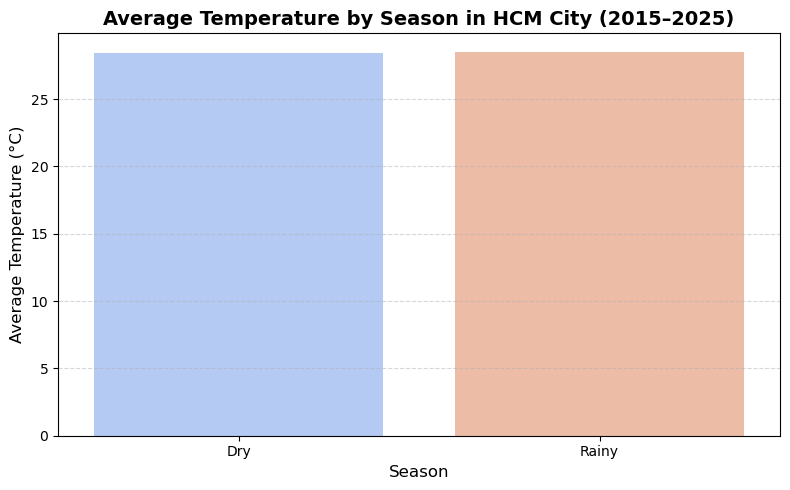

In [39]:
# Vẽ biểu đồ
plt.figure(figsize=(8,5))
sns.barplot(data=season_avg, x='season', y='temp', hue='season', palette='coolwarm', legend=False)

plt.title('Average Temperature by Season in HCM City (2015–2025)', fontsize=14, fontweight='bold')
plt.xlabel('Season', fontsize=12)
plt.ylabel('Average Temperature (°C)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


According to the results, the average temperature between the two seasons is almost insignificant — only `about 0.02°C`, showing that:

The city has a stable temperature all year round, with no clear difference between the dry and rainy seasons.

The rainfall factor varies more than the temperature — a typical feature of a sub-equatorial tropical climate.

The rainy season is slightly warmer `28.46°C`, possibly due to high humidity and heat accumulation in the afternoon before the rain.

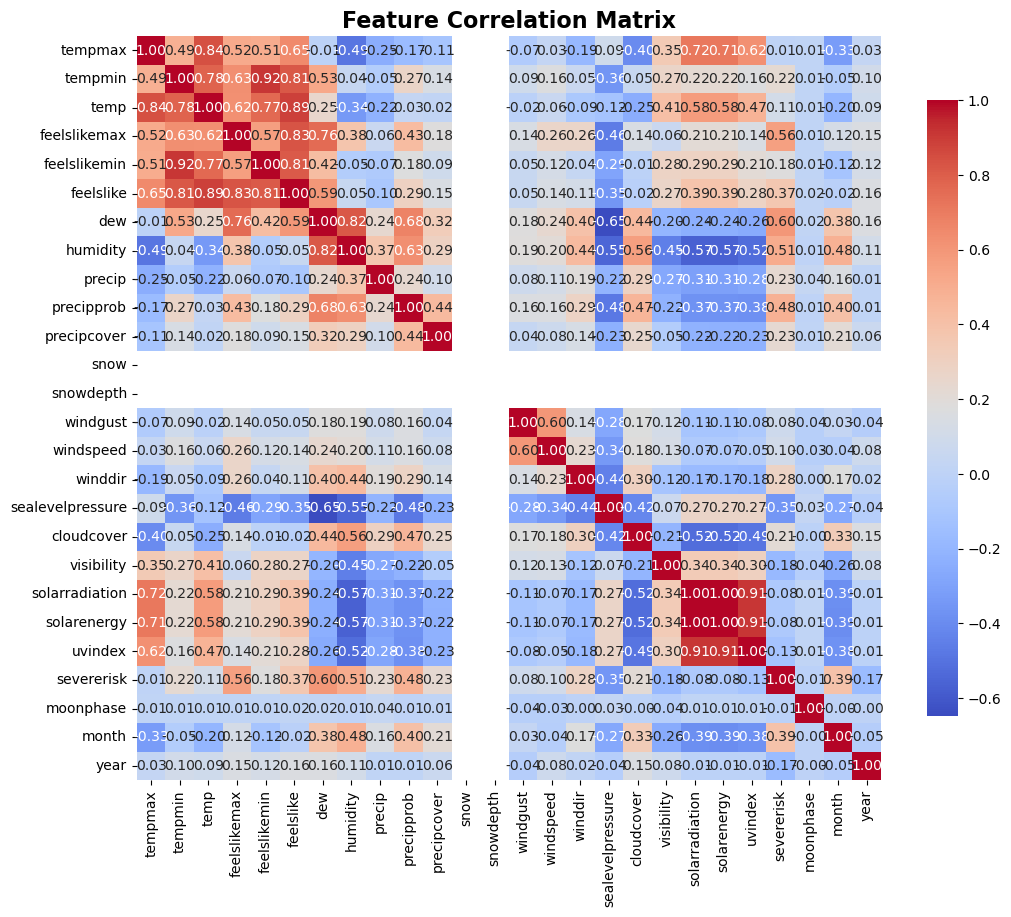

In [22]:
# Relationship between features
corr = df.corr(numeric_only=True)
plt.figure(figsize= (12,10))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title("Feature Correlation Matrix", fontsize=16, fontweight="bold")
plt.show()

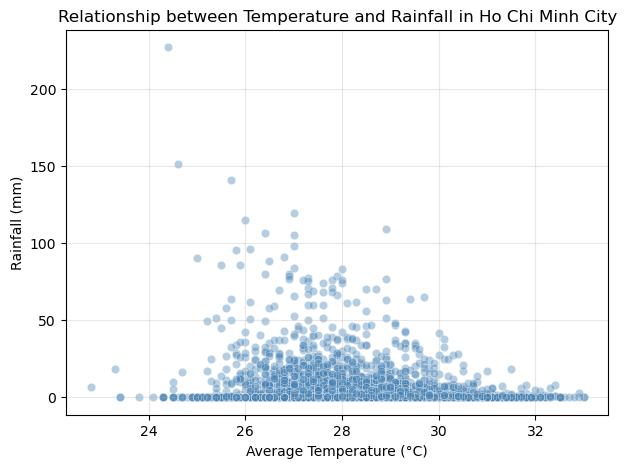

In [23]:
# Relationship between temperature and rainfall
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='temp', y='precip', alpha=0.4, color='steelblue')
plt.title('Relationship between Temperature and Rainfall in Ho Chi Minh City')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Rainfall (mm)')
plt.grid(alpha=0.3)
plt.show()

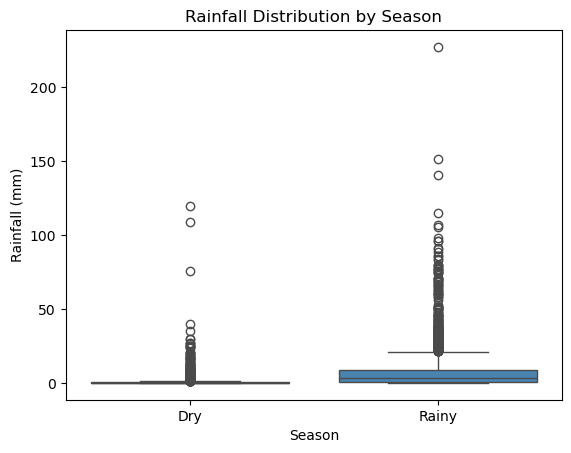

In [40]:
sns.boxplot(data=df, x='season', y='precip', hue='season', palette='Blues', legend=False)
plt.title('Rainfall Distribution by Season')
plt.xlabel('Season')
plt.ylabel('Rainfall (mm)')
plt.show()


In the `dry season`: rainfall is `almost zero`, with only a few small values ​​and few exceptions.

In the `rainy season`: rainfall `increases significantly`, the median is much higher, and there are many outliers → representing unusual showers or heavy rain.

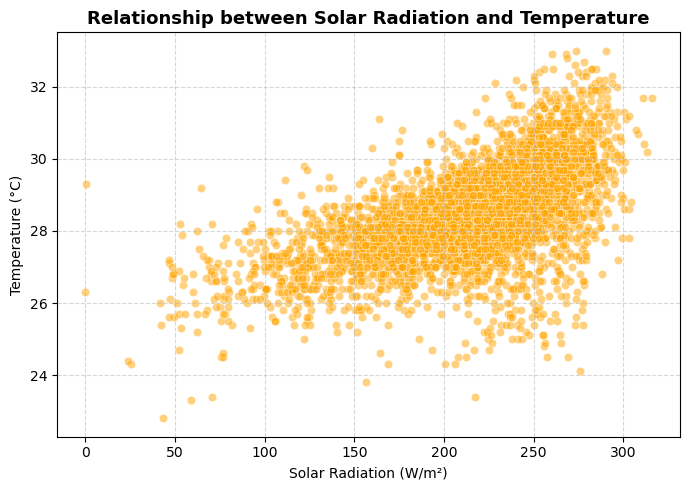

In [25]:
# Relationship between solar radiation and temperature
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='solarradiation', y='temp', alpha=0.5, color='orange')
plt.title("Relationship between Solar Radiation and Temperature", fontsize=13, fontweight='bold')
plt.xlabel("Solar Radiation (W/m²)")
plt.ylabel("Temperature (°C)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

When `solar radiation increases`, `temperature` also `increases` → showing that Ho Chi Minh City is clearly affected by strong sunlight in the dry season.

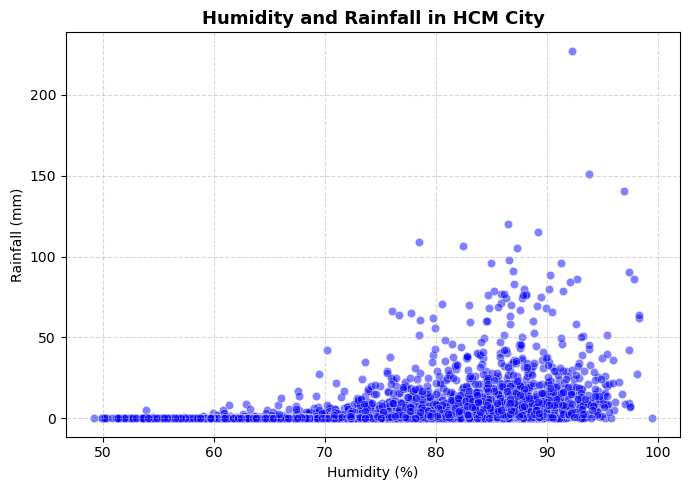

In [26]:
# Relationship between humidity and rainfall
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='humidity', y='precip', alpha=0.5, color='blue')
plt.title("Humidity and Rainfall in HCM City", fontsize=13, fontweight='bold')
plt.xlabel("Humidity (%)")
plt.ylabel("Rainfall (mm)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


The scatterplot between humidity and rainfall in Ho Chi Minh City shows a clear positive relationship.
When `humidity levels` are `below 65%`, almost no rainfall occurs, corresponding to the dry season.
As `humidity rises above 80%`, rainfall frequency and intensity increase sharply, indicating the onset of the rainy season.
This pattern highlights the city’s `tropical monsoon climate`, where high `humidity` acts as a `key factor` that `triggers heavy rainfall`.

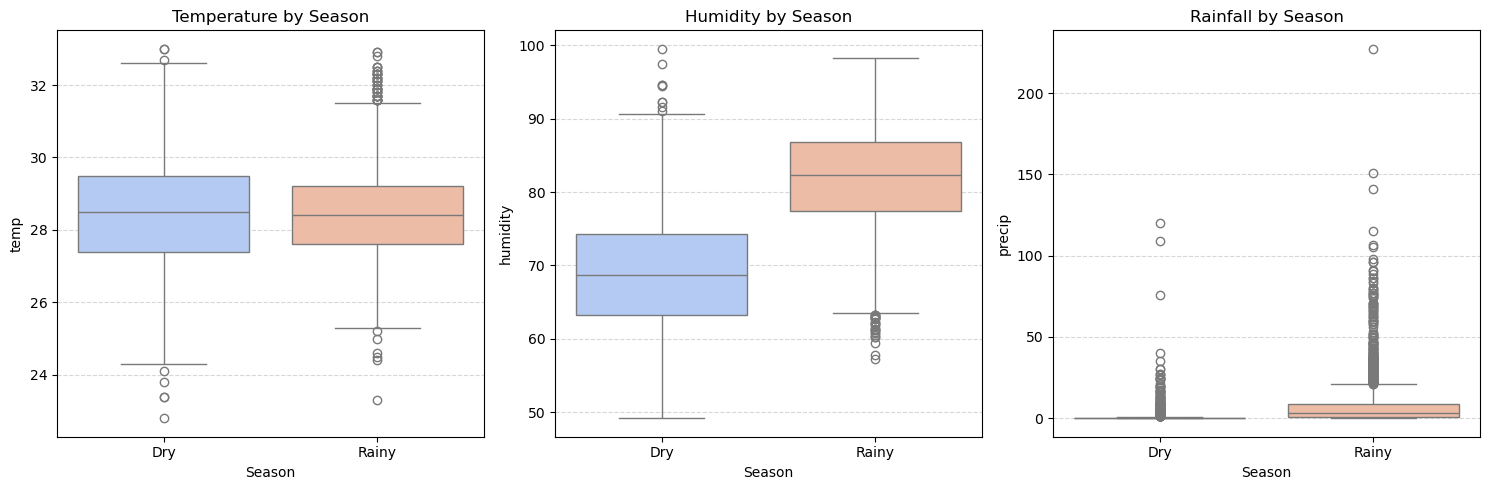

In [41]:
def boxplot(ax, y, title):
    sns.boxplot(x='season', y=y, data=df, hue='season', palette='coolwarm', legend=False, ax=ax)
    ax.set_title(title)
    ax.set_xlabel("Season")
    ax.grid(True, axis='y', linestyle='--', alpha=0.5)

fig, axes = plt.subplots(1, 3, figsize=(15,5))
boxplot(axes[0], 'temp', "Temperature by Season")
boxplot(axes[1], 'humidity', "Humidity by Season")
boxplot(axes[2], 'precip', "Rainfall by Season")

plt.tight_layout()
plt.show()


The seasonal boxplots clearly highlight Ho Chi Minh City’s `tropical monsoon climate`.
During the `dry season`, `temperatures` are `higher`, `humidity` is `low`, and `rainfall` is `nearly absent`.
In contrast, the `rainy season` features much `higher humidity and precipitation`, while `temperatures slightly decrease` due to cloud cover and frequent rain.
These differences emphasize the city’s distinct two-season pattern: a hot–dry period and a humid–rainy one.

### STEP 3

In [28]:
num_features = ['tempmax', 'tempmin', 'feelslikemax', 'feelslikemin', 'feelslike',
                'dew', 'humidity', 'precip', 'precipprob', 'precipcover', 'snow', 'snowdepth',
                'windgust', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover',
                'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'moonphase']

cat_features = ['preciptype', 'conditions', 'description', 'icon', 'stations']
time_features = ['datetime', 'sunrise', 'sunset']
target = 'temp' 

1. Kiểm tra Missing Value

In [29]:
df.isnull().sum()

name                   0
datetime               0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
precipcover            0
preciptype           921
snow                   0
snowdepth              0
windgust               0
windspeed              0
winddir                0
sealevelpressure       0
cloudcover             0
visibility             0
solarradiation         0
solarenergy            0
uvindex                0
severerisk          2566
sunrise                0
sunset                 0
moonphase              0
conditions             0
description            0
icon                   0
stations               0
month                  0
year                   0
season                 0
dtype: int64

In [30]:
df = df.fillna(df.mean(numeric_only = True))
df = df.fillna("unknown")

In [31]:
# điền giá trị theo xu hướng liền kề
#df[num_features] = df[num_features].interpolate(method='linear')


In [32]:
# #CÓ nên loại bỏ hoặc xứ lí các giá trị ngoại lai(Outlier)
# for col in ['temp', 'humidity', 'precip', 'windspeed', 'sealevelpressure']:
#     sns.boxplot(x=df[col])
#     plt.title(f'Boxplot of {col}')
#     plt.show()

2. Chuẩn hóa và mã hóa 

In [33]:
df = pd.get_dummies(df, columns = cat_features, drop_first= True)

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [35]:
X = df.drop(columns=['temp'])
y = df['temp']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

scaler = StandardScaler()
X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])


In [36]:
#lưu scaler để sử dụng sau này
import joblib
joblib.dump(scaler, 'scaler.pkl')  # Lưu scaler

['scaler.pkl']

In [37]:
corr_matrix = df[num_features].corr()
corr_matrix

,tempmax,tempmin,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase
tempmax,1.000000,0.487234,0.516415,0.508098,0.649398,-0.008710,-0.489181,-0.246148,-0.170925,-0.108941,...,0.029428,-0.185429,0.087515,-0.401027,0.346607,0.715861,0.714764,0.622385,0.005112,0.014188
tempmin,0.487234,1.000000,0.629105,0.916150,0.814894,0.528007,0.043307,-0.054244,0.271445,0.142012,...,0.163662,0.054365,-0.358704,0.051735,0.267939,0.223705,0.223248,0.163538,0.129598,0.012919
feelslikemax,0.516415,0.629105,1.000000,0.568571,0.827048,0.761780,0.377247,0.056003,0.431649,0.181016,...,0.260460,0.263945,-0.461317,0.138811,0.055253,0.212132,0.210579,0.144668,0.335852,0.013410
feelslikemin,0.508098,0.916150,0.568571,1.000000,0.813197,0.420718,-0.049844,-0.074713,0.175394,0.090098,...,0.121432,0.035870,-0.292335,-0.006859,0.279205,0.288184,0.287813,0.211948,0.115526,0.010090
feelslike,0.649398,0.814894,0.827048,0.813197,1.000000,0.594755,0.047523,-0.098138,0.292089,0.148983,...,0.141515,0.114411,-0.353800,-0.024287,0.269986,0.387970,0.386763,0.284494,0.228693,0.018475
dew,-0.008710,0.528007,0.761780,0.420718,0.594755,1.000000,0.818493,0.235984,0.677959,0.324470,...,0.236981,0.399620,-0.647965,0.442111,-0.201431,-0.236222,-0.237125,-0.258789,0.336955,0.016939
humidity,-0.489181,0.043307,0.377247,-0.049844,0.047523,0.818493,1.000000,0.369580,0.628018,0.294230,...,0.202432,0.439891,-0.550752,0.562440,-0.452402,-0.565079,-0.565355,-0.522943,0.291278,0.007531
precip,-0.246148,-0.054244,0.056003,-0.074713,-0.098138,0.235984,0.369580,1.000000,0.236717,0.101203,...,0.112515,0.190463,-0.216391,0.293690,-0.271540,-0.311236,-0.310951,-0.283983,0.127871,0.035450
precipprob,-0.170925,0.271445,0.431649,0.175394,0.292089,0.677959,0.628018,0.236717,1.000000,0.438947,...,0.162221,0.285207,-0.478618,0.465557,-0.218183,-0.373584,-0.374189,-0.381174,0.276925,0.005850
precipcover,-0.108941,0.142012,0.181016,0.090098,0.148983,0.324470,0.294230,0.101203,0.438947,1.000000,...,0.079047,0.135996,-0.232392,0.245569,-0.052250,-0.222951,-0.223302,-0.225191,0.160754,0.010110


The correlation matrix indicates strong relationships among temperature-related variables (tempmax, tempmin, feelslike), confirming the dataset’s internal consistency.
Humidity is positively correlated with dew point and precipitation probability, but negatively correlated with solar radiation and temperature — a pattern consistent with tropical monsoon climates.
Solar-related variables (solarradiation, solarenergy, uvindex) exhibit nearly perfect correlations (r ≈ 1.0), suggesting potential redundancy to address during model building.

In [38]:
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['dayofweek'] = df['datetime'].dt.dayofweek
df['season'] = df['month'].apply(lambda m: 'Rainy' if 5 <= m <= 11 else 'Dry')
